<a href="https://colab.research.google.com/github/ghaydakk/Deep-Learning/blob/main/Santander_Customer_Transaction_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Link: https://www.kaggle.com/c/santander-customer-transaction-prediction/data
train_df = pd.read_csv('gdrive/My Drive/train.csv')
test_df = pd.read_csv('gdrive/My Drive/test.csv')
print('train data shape >>',train_df.shape)
print('test data shape >>',test_df.shape)

Mounted at /content/gdrive
train data shape >> (200000, 202)
test data shape >> (200000, 201)


In [ ]:
train_df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,7.567236,0.394340,-3.245596,14.023978,8.530232,7.537606,14.573126,9.333264,-5.696731,15.244013,12.438567,13.290894,17.257883,4.305430,3.019540,10.584400,13.667496,-4.055133,-1.137908,5.532980,5.053874,-7.687740,10.393046,-0.512886,14.774147,11.434250,3.842499,2.187230,5.868899,10.642131,...,24.259300,5.633293,5.362896,11.002170,-2.871906,19.315753,2.963335,-4.151155,4.937124,5.636008,-0.004962,-0.831777,19.817094,-0.677967,20.210677,11.640613,-2.799585,11.882933,-1.014064,2.591444,-2.741666,10.085518,0.719109,8.769088,12.756676,-3.983261,8.970274,-10.335043,15.377174,0.746072,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,1.235070,5.500793,5.970253,0.190059,4.639536,2.247908,0.411711,2.557421,6.712612,7.851370,7.996694,5.876254,8.196564,2.847958,0.526893,3.777245,0.285535,5.922210,1.523714,0.783367,2.615942,7.965198,2.159891,2.587830,4.322325,0.541614,5.179559,3.119978,2.249730,4.278903,...,10.880263,0.217938,1.419612,5.262056,5.457784,5.024182,0.369684,7.798020,3.105986,0.369437,4.424621,5.378008,8.674171,5.966674,7.136427,2.892167,7.513939,2.628895,8.579810,2.798956,5.261243,1.371862,8.963434,4.474924,9.318280,4.725167,3.189759,11.574708,3.944604,0.976348,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,3.970500,-20.731300,-26.095000,13.434600,-6.011100,1.013300,13.076900,0.635100,-33.380200,-10.664200,-12.402500,-5.432200,-10.089000,-5.322500,1.209800,-0.678400,12.720000,-24.243100,-6.166800,2.089600,-4.787200,-34.798400,2.140600,-8.986100,1.508500,9.816900,-16.513600,-8.095100,-1.183400,-6.337100,...,-7.452200,4.852600,0.623100,-6.531700,-19.997700,3.816700,1.851200,-35.969500,-5.250200,4.258800,-14.506000,-22.479300,-11.453300,-22.748700,-2.995300,3.241500,-29.116500,4.952100,-29.273400,-7.856100,-22.037400,5.416500,-26.001100,-4.808200,-18.489700,-22.583300,-3.022300,-47.753600,4.412300,-2.554300,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.26

In [ ]:
test_df.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,0.371335,-3.268551,14.022662,8.540872,7.532703,14.573704,9.321669,-5.70445,15.265776,12.456675,13.298428,17.230598,4.299010,3.019707,10.567479,13.666970,-3.983721,-1.129536,5.530656,5.047247,-7.687695,10.404920,-0.524830,14.762686,11.434861,3.870130,2.213288,5.875048,10.647806,0.672667,...,24.146181,5.635300,5.360975,11.026376,-2.857328,19.320760,2.962821,-4.189133,4.930356,5.633716,-0.020824,-0.805148,19.779528,-0.666240,20.264135,11.635715,-2.776134,11.864538,-0.949318,2.582604,-2.722636,10.080827,0.651432,8.768929,12.719302,-3.963045,8.978800,-10.291919,15.366094,0.755673,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,5.508661,5.961443,0.190071,4.628712,2.255257,0.411592,2.544860,6.74646,7.846983,7.989812,5.884245,8.199877,2.844023,0.527951,3.771047,0.285454,5.945853,1.524765,0.785618,2.610078,7.971581,2.156324,2.588700,4.325727,0.541040,5.170614,3.120685,2.257235,4.260820,4.078592,...,10.876184,0.217936,1.426064,5.268894,5.457937,5.039303,0.370668,7.827428,3.086443,0.365750,4.417876,5.378492,8.678024,5.987419,7.141816,2.884821,7.557001,2.626556,8.570314,2.803890,5.225554,1.369546,8.961936,4.464461,9.316889,4.724641,3.206635,11.562352,3.929227,0.976123,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,-22.672400,-25.811800,13.424500,-4.741300,0.670300,13.203400,0.314300,-28.90690,-11.324200,-12.699400,-2.634600,-9.940600,-5.164000,1.390600,-0.731300,12.749600,-24.536100,-6.040900,2.842500,-4.421500,-34.054800,1.309200,-8.209000,1.691100,9.776400,-16.923800,-10.466800,-0.885100,-5.368300,-14.083700,...,-8.925700,4.910600,0.106200,-6.093700,-21.514000,3.667300,1.813100,-37.176400,-5.405700,4.291500,-15.593200,-20.393600,-11.796600,-21.342800,-2.485400,2.951200,-29.838400,5.025300,-29.118500,-7.767400,-20.610600,5.346000,-28.092800,-5.476800,-17.011400,-22.467000,-2.303800,-47.306400,4.429100,-2.511500,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.91190

In [ ]:
train_df.isnull().sum().sum()

0

In [ ]:
test_df.isnull().sum().sum()

0

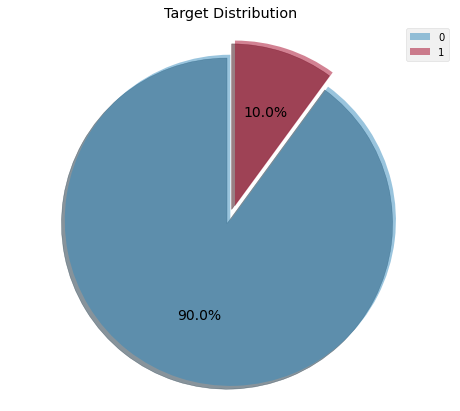

In [ ]:
#t0= train_df[train_df['target']==0] #179902
#t1= train_df[train_df['target']==1] #20098

plt.figure(figsize=(8,7))
plt.pie([179902,20098],
        explode=[0.0,0.09]
        ,autopct='%1.1f%%',
        shadow=True,
        textprops={'fontsize': 14},
        wedgeprops={'alpha':0.5},
        startangle=90)

plt.legend([0,1],loc='best')
plt.title('Target Distribution')
plt.axis('equal')
plt.show()

In [ ]:
from sklearn.feature_selection import chi2 , GenericUnivariateSelect
from sklearn.preprocessing import MinMaxScaler

data = train_df.drop(columns='target')
target = train_df['target']

scaler2= MinMaxScaler(feature_range=(0,1))
data = scaler2.fit_transform(train_df)

FeatureSelection = SelectPercentile(score_func= chi2, percentile=70)
selected_features = FeatureSelection.fit_transform(data,target)

print('selected_features shape is :',selected_features.shape)
cols =np.where(FeatureSelection.get_support())[0]
print(cols)

selected_features shape is : (200000, 8)
[  0   7  13  54  82 140 167 175]


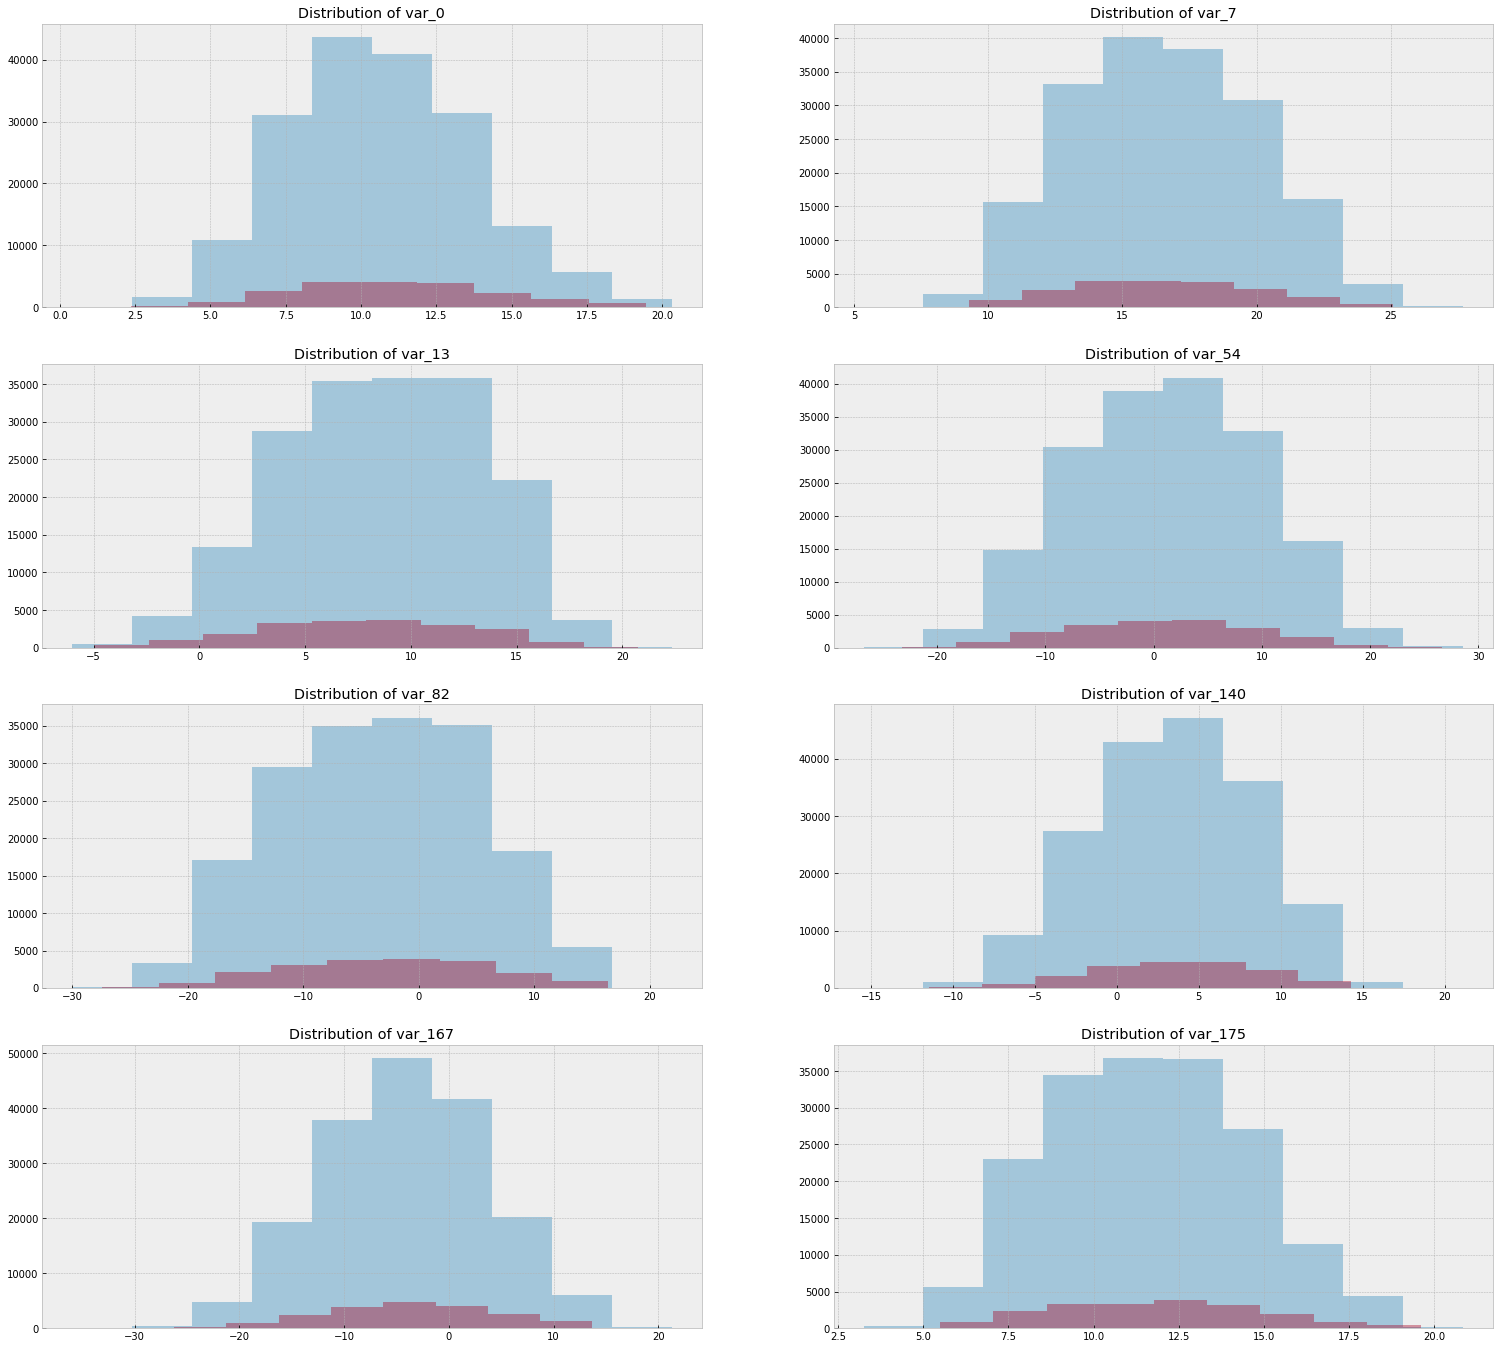

In [ ]:
cols = [ 0 ,  7 , 13 , 54 ,82, 140, 167, 175]

plt.figure(figsize=(26, 24))
for i, col in enumerate(cols):
    plt.subplot(4, 2, i + 1)
    train_df.groupby('target')['var_{}'.format(col)].hist(alpha=.4)
    plt.title('Distribution of var_{}'.format(col))
plt.show()

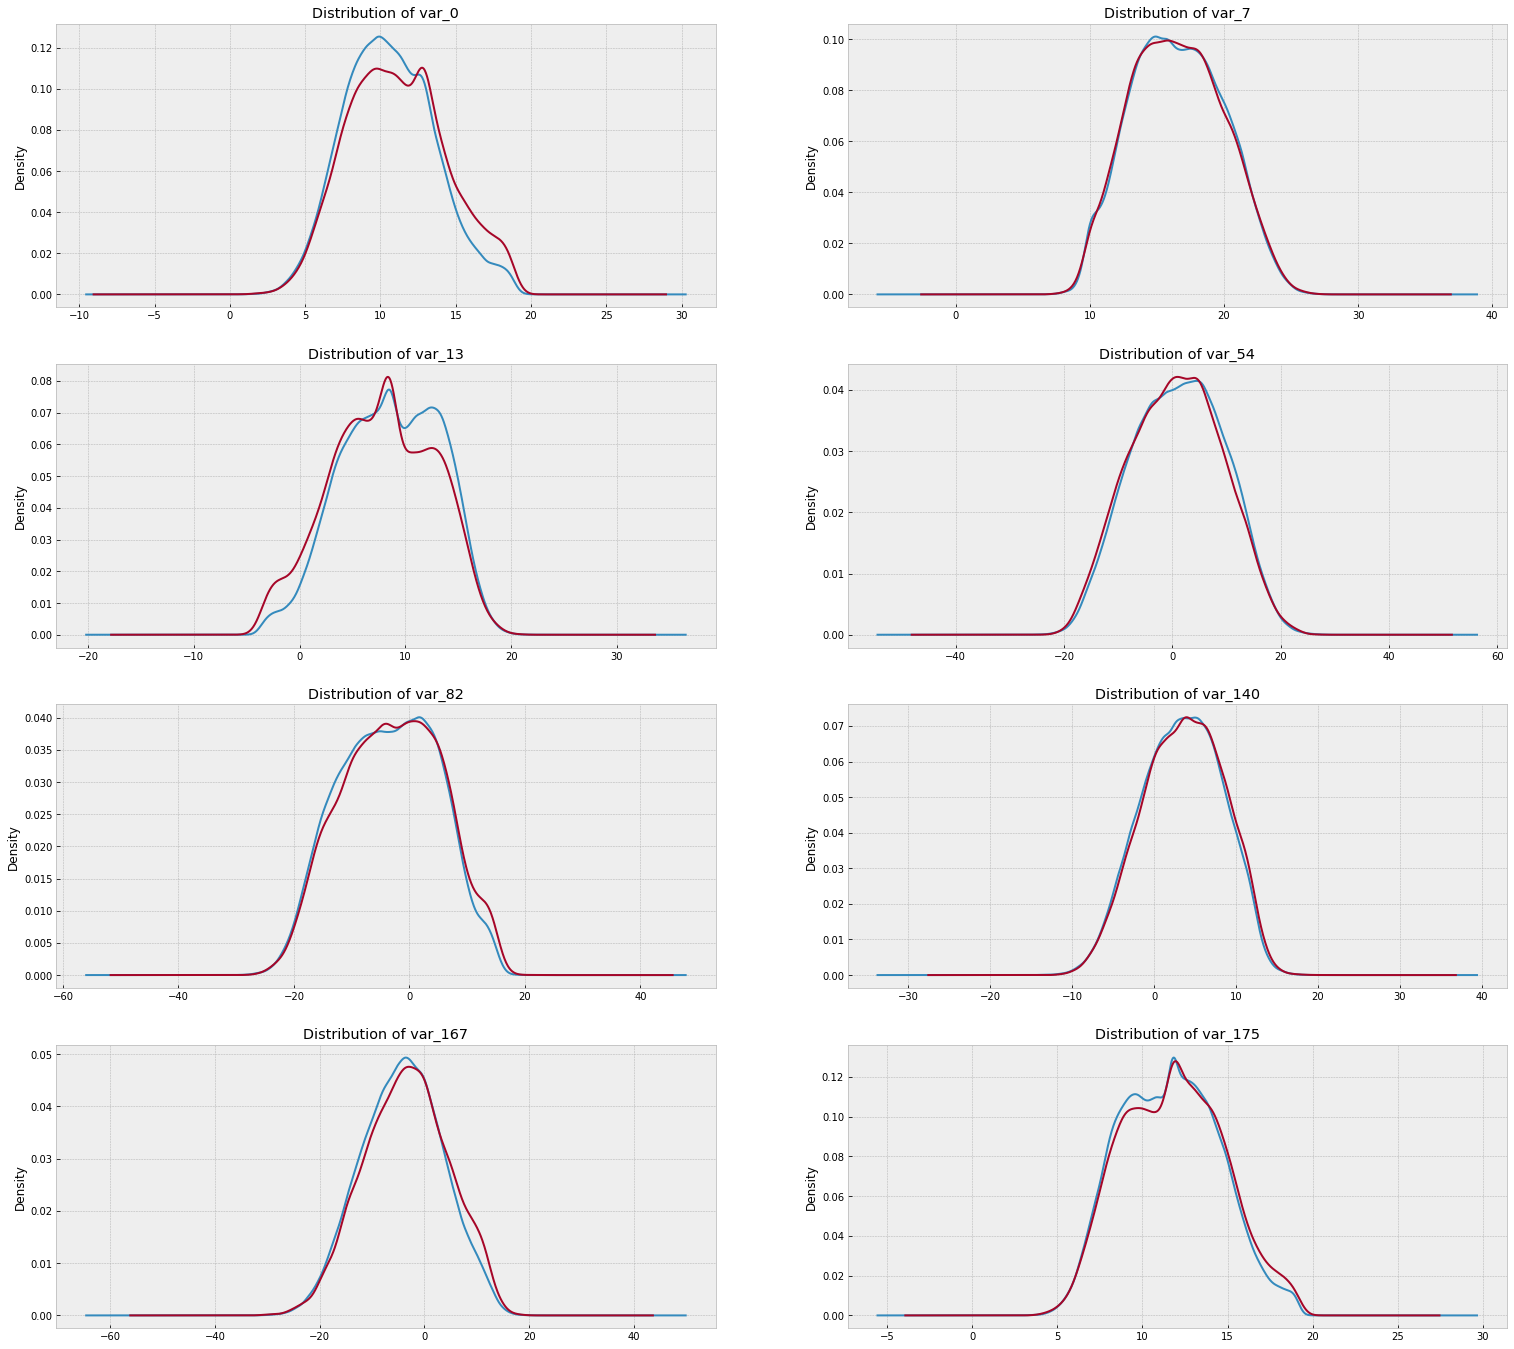

In [ ]:
plt.figure(figsize=(26, 24))
for i, col in enumerate(cols):
    plt.subplot(4, 2, i + 1)
    train_df.groupby('target')['var_{}'.format(col)].plot(kind='kde')
    plt.title('Distribution of var_{}'.format(col))
plt.show()

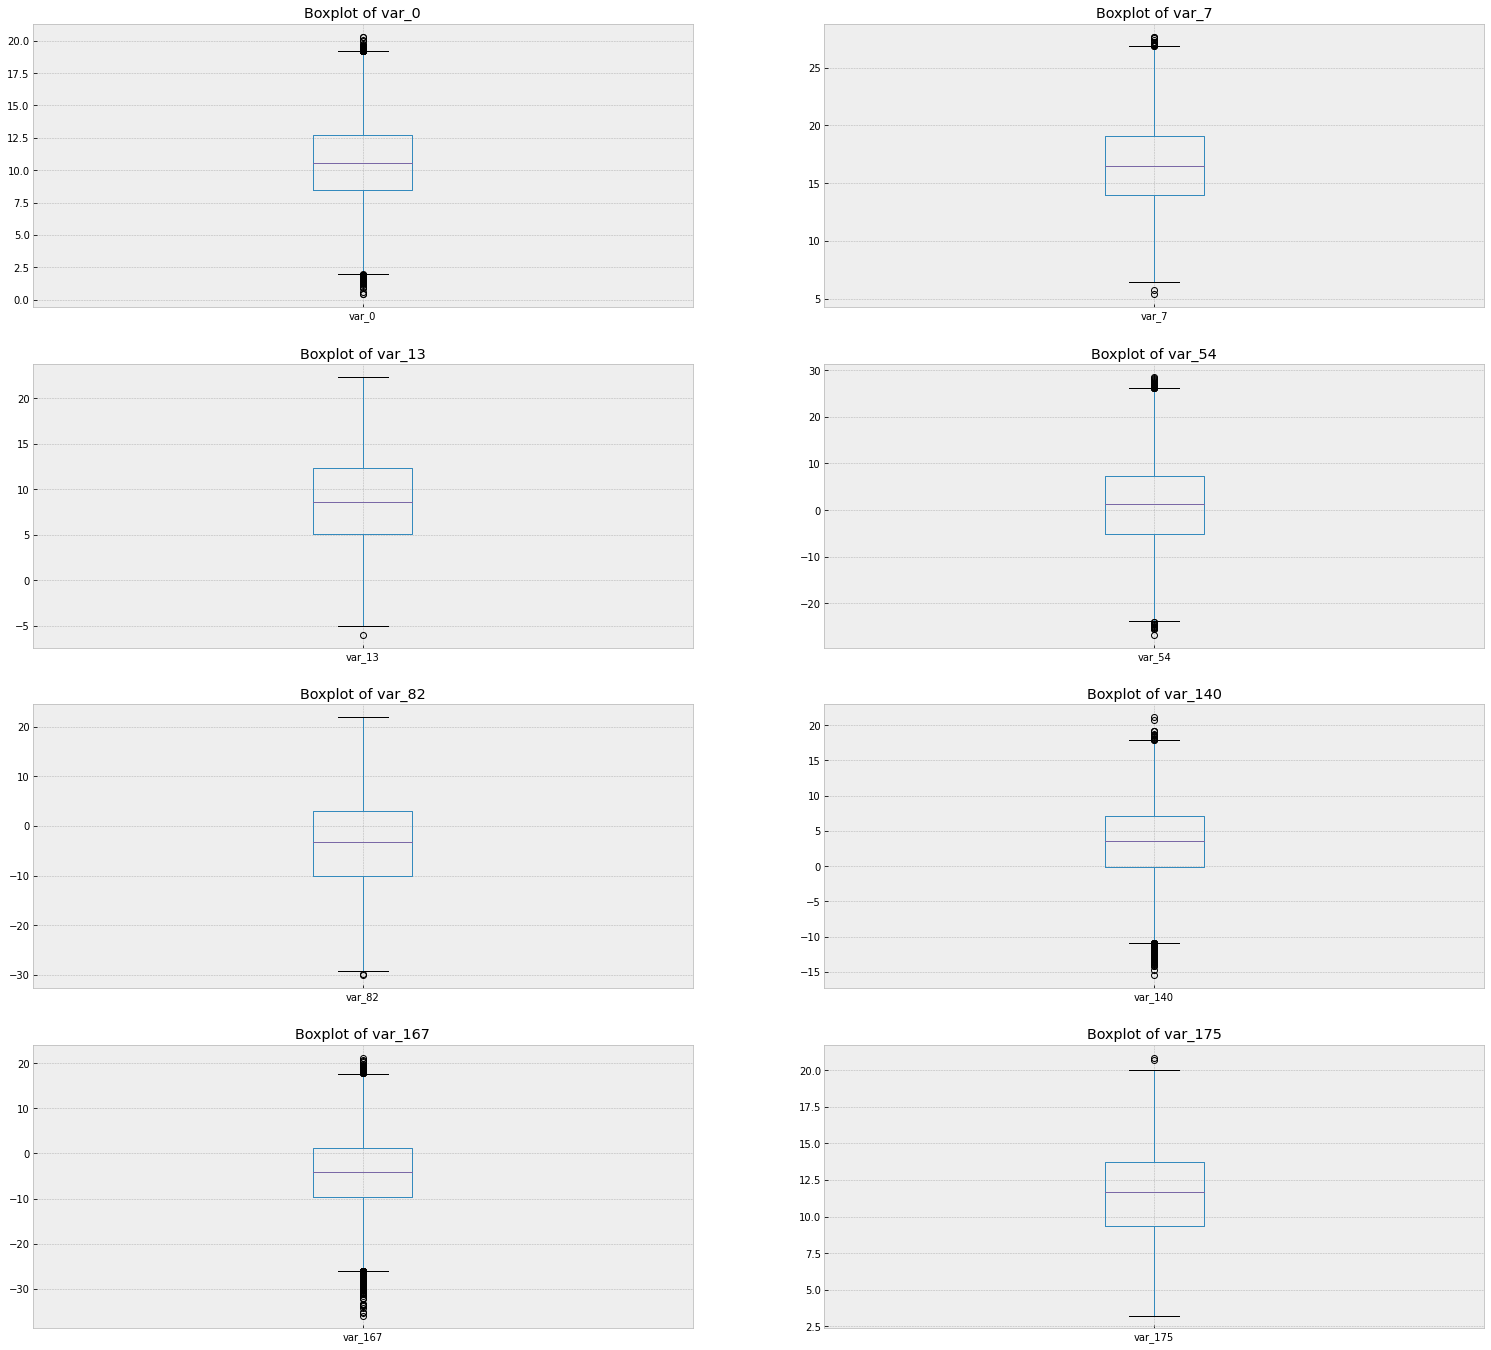

In [ ]:
plt.figure(figsize=(26, 24))
for i, col in enumerate(cols):
    plt.subplot(4, 2, i + 1)
    train_df.boxplot(column='var_{}'.format(col))
    plt.title('Boxplot of var_{}'.format(col))
plt.show()

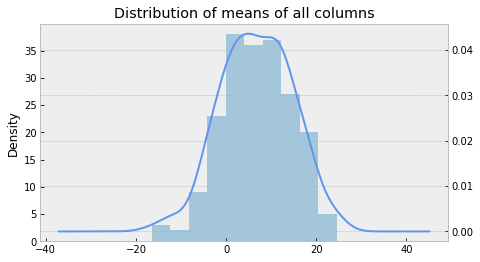

In [ ]:
#t0 = train_df[train_df['target']==0]
#t1 = train_df[train_df['target']==1]
df = train_df.drop(columns='target')
ax = df[df.columns].mean().plot.hist(alpha=.4)
df[df.columns].mean().plot(kind='kde', ax=ax, secondary_y=True, color = 'cornflowerblue')
plt.gcf().set_size_inches(7.3,4)
plt.title('Distribution of means of all columns')
plt.show()

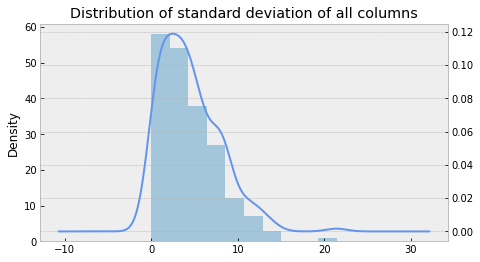

In [ ]:
ax = df[df.columns].std().plot.hist(alpha=.4)
df[df.columns].std().plot(kind='kde', ax=ax, secondary_y=True, color = 'cornflowerblue')
plt.gcf().set_size_inches(7.3,4)
plt.title('Distribution of standard deviation of all columns')
plt.show()

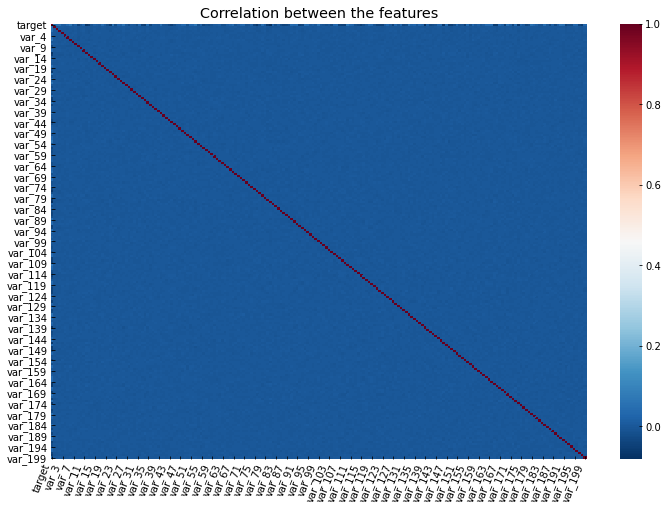

In [ ]:
import seaborn as sns

corr = train_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(
    corr,
    cmap= 'RdBu_r'
   )
plt.xticks(rotation=68,horizontalalignment='right')
plt.title('Correlation between the features')
plt.show()

In [ ]:
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, fbeta_score




# shuffling the dataset
train_df = train_df.sample(frac=1)

y=train_df['target']
x= train_df.drop(columns=['target','ID_code'])
X= pd.DataFrame(x)
 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)
X.shape

(200000, 200)

In [ ]:
import numpy as np


def build_cf_matrics(cf_matrix,classifier_name):
  group_names = ['TN','FP','FN','TP']

  group_percentages = ['{0:.2%}'.format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]

  labels = [f'{v1}\n{v2}' for v1, v2 in
            zip(group_names,group_percentages)]

  labels = np.asarray(labels).reshape(2,2)

  sns.heatmap(cf_matrix, annot=labels,
              annot_kws={"size": 22},
              fmt='', cmap='RdBu_r') 
  plt.title(classifier_name,size=22)
  return plt.show()



def MLmodel(model_used, model_name):
  print('************',model_name,'***************')
 
  steps=[
        ('scaler', MinMaxScaler(feature_range=(0,1))),
      #  ('features_selection', SelectPercentile(score_func= chi2, percentile=70)),
     #    ('pca', PCA(n_components =100)),
        ('model', model_used)
  ]

  pipe = Pipeline(steps)
  

  plt.style.use('bmh')

  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)
  print('Train Score: {} .... Test Score: {}'.format(pipe.score(X_train, y_train), pipe.score(X_test, y_test)))
  cv = cross_val_score(model_used,X_train,y_train,cv=5)
  print('CV Score: {}'.format(cv.mean()))
  print()
  print(classification_report(y_test, y_pred))
  tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
  specificity = tn / (tn+fp)
  false_positive_rate = 1- specificity
  print('F2 score: {}'.format(fbeta_score(y_test, y_pred, beta=2)))
  print('True Positive Rate (Sensitivity): {}'.format(recall_score(y_test,y_pred)))
  print('False Positive Rate (1 - Specificity): {}'.format(false_positive_rate))
  print()
  
  
  cf_matrix = confusion_matrix(y_test,y_pred)
  build_cf_matrics(cf_matrix,model_name)
  
  pipe.predict(X_test)[0:10]
  pipe.predict_proba(X_test)[0:10,:]
  y_pred_prob= pipe.predict_proba(X_test)[:,1]
  plt.hist(y_pred_prob,bins=10,color='cornflowerblue',alpha=.8)
  plt.gcf().set_size_inches(4.5,4)
  plt.title('Histogram of Predicted Probabilities')
  plt.xlabel('Predicted Probabilities')
  plt.ylabel('Frequency')
  plt.show()

  fqr , tqr, thresholds= metrics.roc_curve(y_test,y_pred_prob)
  plt.plot(fqr,tqr)
  plt.xlim([0.0,1.0])
  plt.ylim([0.0,1.0])
  plt.xlabel('False Positve Rate (1 - Specificity)')
  plt.ylabel('True Positve Rate (Sensitivity)')
  plt.grid(True)
  plt.gcf().set_size_inches(4.5,4)
  plt.title('ROC Curve')
  plt.show()

  auc = metrics.roc_auc_score(y_test,y_pred_prob)
  print('AUC: {}'.format(auc))

************ Naive Bayes ***************
Train Score: 0.92186875 .... Test Score: 0.920925
CV Score: 0.920925

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     35933
           1       0.72      0.37      0.49      4067

    accuracy                           0.92     40000
   macro avg       0.82      0.68      0.72     40000
weighted avg       0.91      0.92      0.91     40000

F2 score: 0.40635560885206584
True Positive Rate (Sensitivity): 0.36660929432013767
False Positive Rate (1 - Specificity): 0.016335958589597355



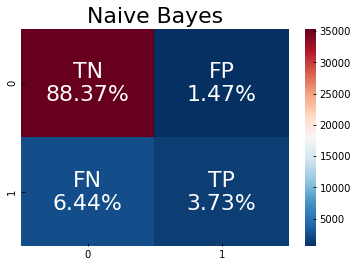

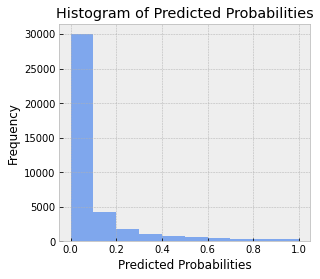

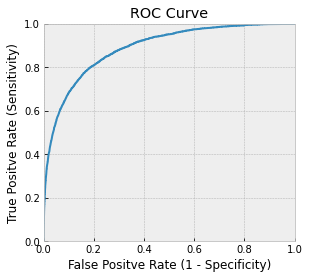

AUC: 0.8889613021902064


In [ ]:
from sklearn.naive_bayes import GaussianNB
MLmodel(GaussianNB(), 'Naive Bayes')

************ Logistic Regression ***************
Train Score: 0.91385 .... Test Score: 0.91725
CV Score: 0.91725

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     36065
           1       0.71      0.27      0.39      3935

    accuracy                           0.92     40000
   macro avg       0.82      0.63      0.67     40000
weighted avg       0.90      0.92      0.90     40000

F2 score: 0.309547272621877
True Positive Rate (Sensitivity): 0.27141041931385007
False Positive Rate (1 - Specificity): 0.012283377235546955



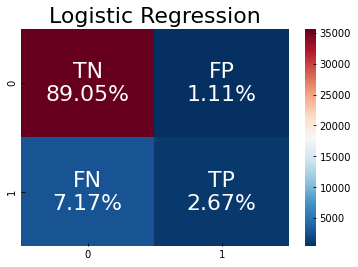

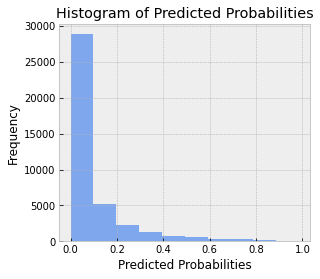

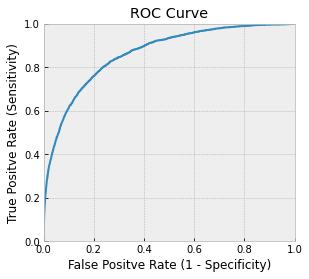

AUC: 0.8633850112857431


In [ ]:
from sklearn.linear_model import LogisticRegression
MLmodel(LogisticRegression(class_weight='unbalanced'), 'Logistic Regression')

************ Decision Tree ***************
Train Score: 0.9005857142857143 .... Test Score: 0.8984166666666666
CV Score: 0.8979785714285715

              precision    recall  f1-score   support

           0       0.90      0.99      0.95     54047
           1       0.35      0.03      0.05      5953

    accuracy                           0.90     60000
   macro avg       0.62      0.51      0.50     60000
weighted avg       0.85      0.90      0.86     60000

True Positive Rate (Sensitivity): 0.026877204770703846
False Positive Rate (1 - Specificity): 0.005587729198660463



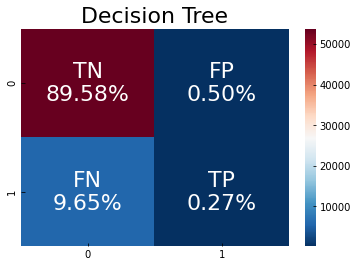

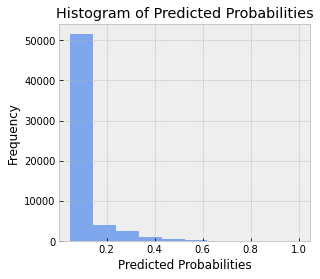

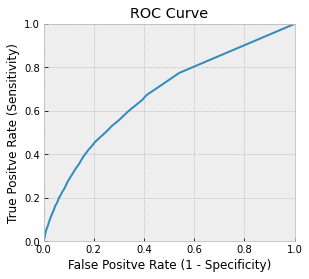

AUC: 0.6733691691919499


In [ ]:
from sklearn.tree import  DecisionTreeClassifier
MLmodel(DecisionTreeClassifier(max_depth=10, min_samples_split=500),'Decision Tree')

************ Random Forest ***************
Train Score: 0.9995571428571428 .... Test Score: 0.9008333333333334
CV Score: 0.8990357142857143

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     54047
           1       0.80      0.00      0.00      5953

    accuracy                           0.90     60000
   macro avg       0.85      0.50      0.47     60000
weighted avg       0.89      0.90      0.85     60000

True Positive Rate (Sensitivity): 0.0006719301192675962
False Positive Rate (1 - Specificity): 1.8502414565135794e-05



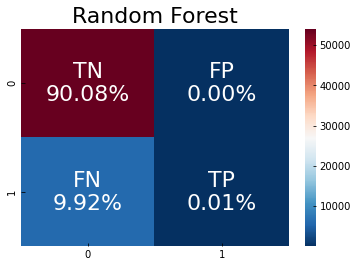

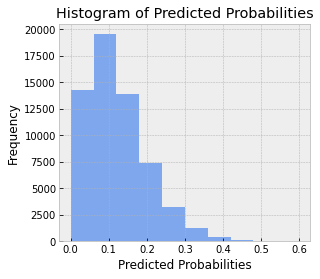

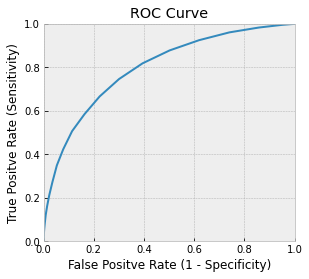

AUC: 0.7968465775091058


In [ ]:
from sklearn.ensemble import RandomForestClassifier
MLmodel(RandomForestClassifier(n_estimators=50), 'Random Forest')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


************ Voting Classifier ***************
Train Score: 0.91875 .... Test Score: 0.9214
CV Score: 0.9214

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     36065
           1       0.75      0.30      0.43      3935

    accuracy                           0.92     40000
   macro avg       0.84      0.65      0.70     40000
weighted avg       0.91      0.92      0.91     40000

F2 score: 0.3450960041515309
True Positive Rate (Sensitivity): 0.30419313850063534
False Positive Rate (1 - Specificity): 0.011257451823097231



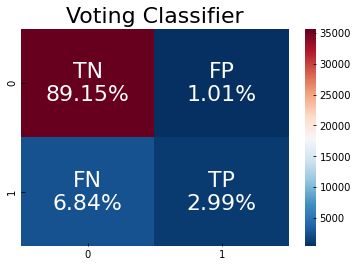

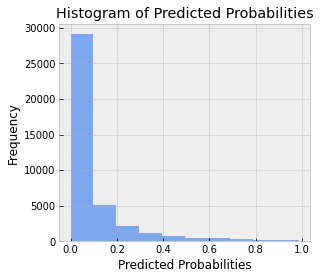

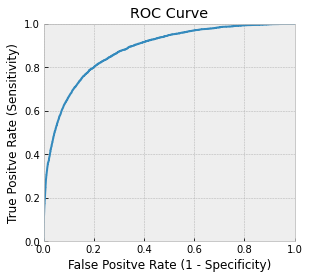

AUC: 0.8818164013126801


In [ ]:
from sklearn.ensemble import VotingClassifier

model1 = LogisticRegression()
model2 = GaussianNB()
model = VotingClassifier(estimators=[('lr', model1), ('nb', model2)], voting='soft')

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('************ Voting Classifier ***************')
print('Train Score: {} .... Test Score: {}'.format(model.score(X_train, y_train), model.score(X_test, y_test)))
cv = cross_val_score(saved_model,X_train,y_train,cv=5)
print('CV Score: {}'.format(cv.mean()))
print()
print(classification_report(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
specificity = tn / (tn+fp)
false_positive_rate = 1- specificity
print('F2 score: {}'.format(fbeta_score(y_test, y_pred, beta=2)))
print('True Positive Rate (Sensitivity): {}'.format(recall_score(y_test,y_pred)))
print('False Positive Rate (1 - Specificity): {}'.format(false_positive_rate))
print()
  
  
cf_matrix = confusion_matrix(y_test,y_pred)
group_names = ['TN','FP','FN','TP']

group_percentages = ['{0:.2%}'.format(value) for value in
                    cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels,
            annot_kws={"size": 22},
            fmt='', cmap='RdBu_r') 
plt.title('Voting Classifier',size=22)
plt.show()
  
model.predict(X_test)[0:10]
model.predict_proba(X_test)[0:10,:]
y_pred_prob= model.predict_proba(X_test)[:,1]

plt.hist(y_pred_prob,bins=10,color='cornflowerblue',alpha=.8)
plt.gcf().set_size_inches(4.5,4)
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Frequency')
plt.show()

fqr , tqr, thresholds= metrics.roc_curve(y_test,y_pred_prob)

plt.plot(fqr,tqr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positve Rate (1 - Specificity)')
plt.ylabel('True Positve Rate (Sensitivity)')
plt.grid(True)
plt.gcf().set_size_inches(4.5,4)
plt.title('ROC Curve')
plt.show()

auc = metrics.roc_auc_score(y_test,y_pred_prob)
print('AUC: {}'.format(auc))

************ Bagging Classifier ***************
Train Score: 0.9995857142857143 .... Test Score: 0.9001666666666667
CV Score: 0.9

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     53980
           1       0.79      0.01      0.01      6020

    accuracy                           0.90     60000
   macro avg       0.84      0.50      0.48     60000
weighted avg       0.89      0.90      0.85     60000

True Positive Rate (Sensitivity): 0.00681063122923588
False Positive Rate (1 - Specificity): 0.00020377917747316232



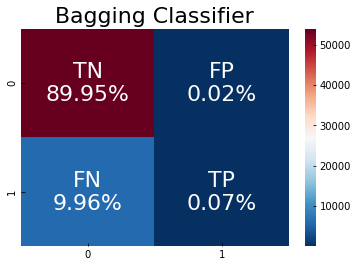

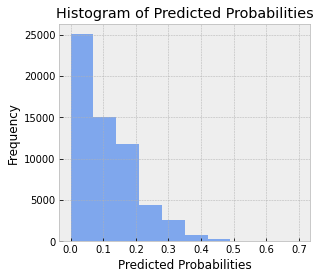

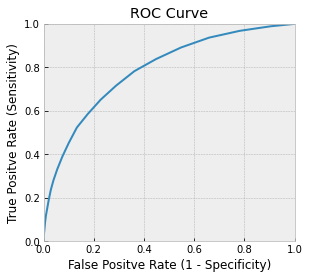

AUC: 0.7876093751346321


In [ ]:
from sklearn.ensemble import BaggingClassifier
MLmodel(BaggingClassifier(n_estimators=50),'Bagging Classifier')

************ AdaBoost Classifier ***************
Train Score: 0.907025 .... Test Score: 0.9093
CV Score: 0.9093

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     36065
           1       0.64      0.18      0.28      3935

    accuracy                           0.91     40000
   macro avg       0.78      0.59      0.62     40000
weighted avg       0.89      0.91      0.89     40000

F2 score: 0.2117312140442441
True Positive Rate (Sensitivity): 0.18144853875476494
False Positive Rate (1 - Specificity): 0.011285179536947187



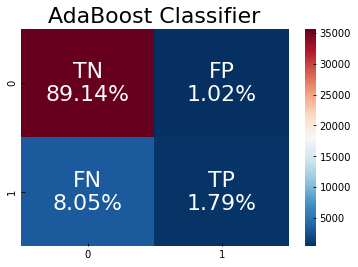

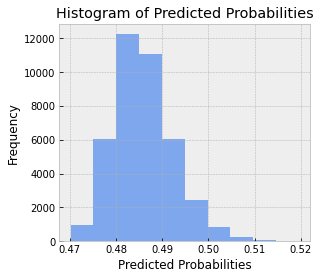

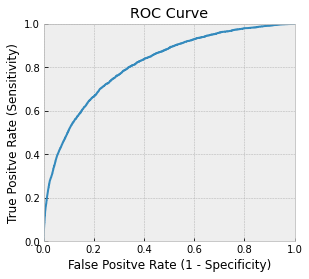

AUC: 0.8144494401697062


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
MLmodel(AdaBoostClassifier(), 'AdaBoost Classifier')

************ SVC Classifier with kernal_rbf ***************
Train Score: 0.9485714285714286 .... Test Score: 0.9
CV Score: 0.9031428571428572

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1350
           1       0.00      0.00      0.00       150

    accuracy                           0.90      1500
   macro avg       0.45      0.50      0.47      1500
weighted avg       0.81      0.90      0.85      1500

True Positive Rate (Sensitivity): 0.0
False Positive Rate (1 - Specificity): 0.0



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


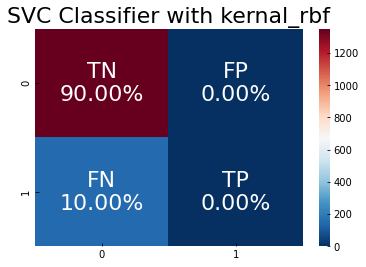

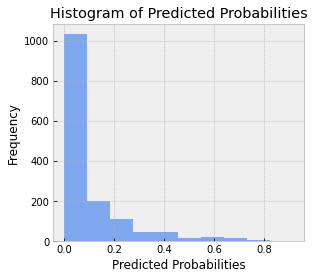

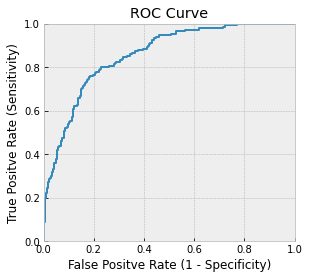

AUC: 0.8568197530864198


In [ ]:
from sklearn.svm import SVC
MLmodel(SVC(C=1.0, kernel='rbf', degree=3, gamma='scale',probability=True),'SVC Classifier with kernal_rbf')

************ SVC Classifier with kernal_linear ***************
Train Score: 0.922 .... Test Score: 0.9046666666666666
CV Score: 0.9028571428571428

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1350
           1       0.64      0.11      0.18       150

    accuracy                           0.90      1500
   macro avg       0.77      0.55      0.57      1500
weighted avg       0.88      0.90      0.87      1500

True Positive Rate (Sensitivity): 0.10666666666666667
False Positive Rate (1 - Specificity): 0.00666666666666671



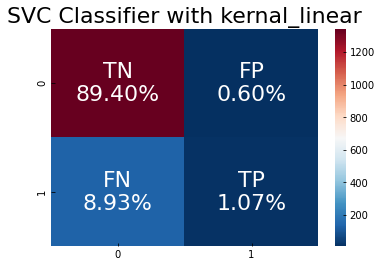

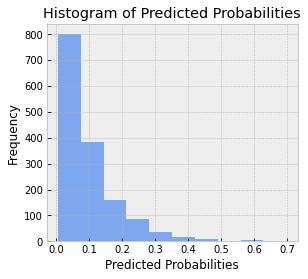

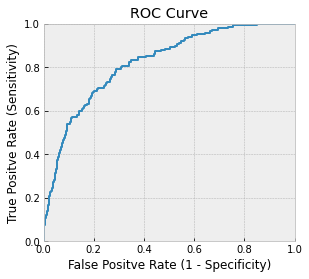

AUC: 0.8214419753086419


In [ ]:
from sklearn.svm import SVC
MLmodel(SVC(kernel='linear',probability=True),'SVC Classifier with kernal_linear')

************ SVC Classifier with kernal_poly ***************
Train Score: 1.0 .... Test Score: 0.9013333333333333
CV Score: 0.9037142857142856

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1350
           1       0.52      0.19      0.28       150

    accuracy                           0.90      1500
   macro avg       0.72      0.59      0.61      1500
weighted avg       0.88      0.90      0.88      1500

True Positive Rate (Sensitivity): 0.19333333333333333
False Positive Rate (1 - Specificity): 0.020000000000000018



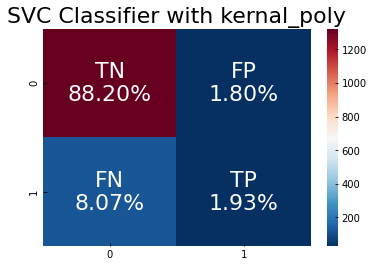

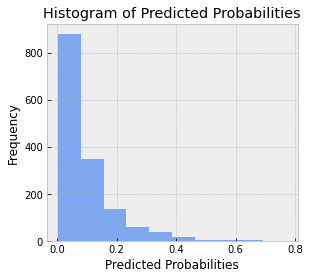

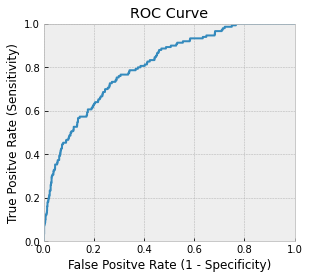

AUC: 0.8064567901234568


In [ ]:
from sklearn.svm import SVC
MLmodel(SVC(kernel='poly',probability=True),'SVC Classifier with kernal_poly')

In [ ]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier


model = LGBMClassifier()

scaler = StandardScaler()
pipe = Pipeline(steps=[('scaler',scaler), ('model', model)])


param_grid = {
    'model__boosting_type': ['gbdt','rf'],
    'model__n_estimators': [50,100],
}

search = GridSearchCV(pipe, param_grid, iid=False, cv=5, return_train_score=False)
search.fit(X_train,y_train)

print('best parameter (cv score-%.3f):'% search.best_score_)
print(search.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 28 .


  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 28 .


  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit faile

best parameter (cv score-0.907):
{'model__boosting_type': 'gbdt', 'model__n_estimators': 100}


************ LGBM Classifier ***************
Train Score: 0.91636875 .... Test Score: 0.909825
CV Score: 0.909825

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     36065
           1       0.88      0.10      0.17      3935

    accuracy                           0.91     40000
   macro avg       0.90      0.55      0.56     40000
weighted avg       0.91      0.91      0.88     40000

F2 score: 0.11719233147804575
True Positive Rate (Sensitivity): 0.0963151207115629
False Positive Rate (1 - Specificity): 0.0014141134063496708



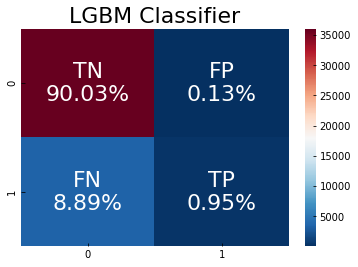

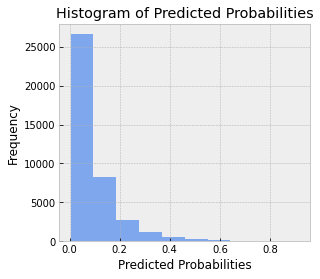

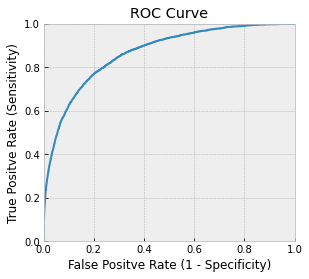

AUC: 0.8658291018035169


In [ ]:
from lightgbm import LGBMClassifier
MLmodel(LGBMClassifier(boosting_type='gbdt', n_estimators=100),'LGBM Classifier')

In [ ]:
from lightgbm import LGBMRegressor
steps=[
       ('scaler', StandardScaler()),
       ('model', LGBMRegressor())
]

pipe = Pipeline(steps)
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

auc = metrics.roc_auc_score(y_test,y_pred)
print('AUC: {}'.format(auc))

AUC: 0.8495888406820705


In [ ]:
from sklearn.model_selection import GridSearchCV

model = LGBMRegressor()

scaler = StandardScaler()
pipe = Pipeline(steps=[('scaler',scaler), ('model', model)])


param_grid = {
    'model__num_leaves': [31,127],
    'model__max_depth': [-1,2,7],
    'model__min_child_samples': [20,100,1000],
}

search = GridSearchCV(pipe, param_grid, iid=False, cv=5, return_train_score=False)
search.fit(X_train,y_train)

print('best parameter (cv score-%.3f):'% search.best_score_)
print(search.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


best parameter (cv score-0.224):
{'model__max_depth': -1, 'model__min_child_samples': 100, 'model__num_leaves': 127}


In [ ]:
steps=[
       ('scaler', StandardScaler()),
       ('model', LGBMRegressor(
                               min_child_samples = 100,
                               num_leaves = 127,
                               objective='binary',
                               reg_alpha=8,
                               reg_lambda=1,
                               n_estimators=5000))
]

pipe = Pipeline(steps)
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

auc = metrics.roc_auc_score(y_test,y_pred)
print('AUC: {}'.format(auc))

test_df1 = test_df.drop(columns=['ID_code'])
prediction = pipe.predict(test_df1)
sub_df = pd.DataFrame({'ID_code': test_df['ID_code'].values})
sub_df['target'] = prediction

sub_df.to_csv('submission.csv' , index=False, header =1)

AUC: 0.8877360102131189
